In [5]:
import random
from src.core import Engine
from src.agents import ETFTrader, FundamentalTrader, TrendTrader, MeanReversionTrader, ZeroIntelligenceTrader

In [6]:
initial_price = 100

In [26]:
total_cash = 1_000_000

zi_share = 0.3642
zi_cash, zi_stocks = 500, 0
zi_n_agents = round(total_cash * zi_share / zi_cash)
zi_agents = [
    ZeroIntelligenceTrader(cash=zi_cash, stocks=zi_stocks, noise=0.1) for i in range(zi_n_agents)
]

agents = zi_agents

eng = Engine()
eng.run(
    agents=agents,
    initial_price=initial_price,
    n_steps=1000,
)

0 100.20112816398428
1 100.43592745018549
2 100.55468012338467
3 100.61033218206774
4 100.76427426923993
5 100.74064314254258
6 101.04416041444252
7 100.39633362415738
8 100.33809900954138
9 99.76286131028166
10 99.70423685710544
11 99.26124878291466
12 99.80891973157216
13 100.24465785123664
14 100.07617723368074
15 99.79496319223871
16 99.14402675246566
17 99.43376756483808
18 98.80335410865536
19 98.81383239376747
20 99.00334109960657
21 98.73787212884484
22 99.19550348025253
23 99.49776492032123
24 99.77179963452957
25 100.2141949105467
26 99.2035039058663
27 98.5399184546003
28 98.34375641995898
29 98.61919446547103
30 98.642086040041
31 98.17324403596903
32 98.57423930594936
33 98.47922940862455
34 98.28868673792165
35 98.43040276300471
36 98.41584238736239
37 98.01997313949889
38 98.17820995297403
39 98.31546330331042
40 98.23840453645182
41 98.03062037392155
42 98.62615590618228
43 98.71061026107634
44 99.03476029534646
45 99.38465918602678
46 99.95466823421498
47 100.381107373

<Axes: >

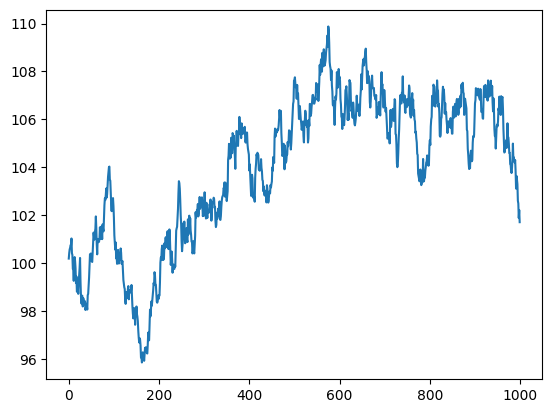

In [27]:
import pandas as pd
price = pd.Series([t[ZeroIntelligenceTrader]["mean_buy_transaction_price"] for t in eng.stats_monitor.trade_stats])
price.plot()

In [15]:
eng.stats_monitor.balance_stats[-1]

defaultdict(collections.Counter,
            {src.agents.zero_intelligence.ZeroIntelligenceTrader: Counter({'total_cash': 364000.00000000023,
                      'total_stocks': -1.1119993814645568e-12,
                      'total_equity': 363999.99999999953,
                      'total_bankrupts': 0})})

In [16]:
buys = [s[ZeroIntelligenceTrader]["mean_weighted_buy_order_price"] for s in eng.stats_monitor.supply_demand_stats]
sells = [s[ZeroIntelligenceTrader]["mean_weighted_sell_order_price"] for s in eng.stats_monitor.supply_demand_stats]

In [17]:
import pandas as pd
df = pd.DataFrame()
df["buys"] = buys
df["sells"] = sells

In [18]:
(df["buys"] - df["sells"]).describe()

count    1000.000000
mean       -0.063753
std         0.592562
min        -1.859584
25%        -0.471935
50%        -0.090153
75%         0.314294
max         1.891089
dtype: float64

In [19]:
import pandas as pd
price = pd.Series([t[ZeroIntelligenceTrader]["mean_buy_transaction_price"] for t in eng.stats_monitor.trade_stats])

In [ ]:
price.plot()

In [87]:
import random

In [ ]:
import numpy as np

In [ ]:
np.random.random()

In [ ]:
r = pd.Series([random.uniform(50, 150) for i in range(100_000)])

In [ ]:
r.describe()

In [ ]:
r.plot.hist(bins=10)

In [ ]:
r.plot.hist(bins=10)

In [ ]:
import numpy as np

pd.Series(1 + (np.random.logistic(size=10_000))).cumprod().iloc[-1]

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
(0.5 + sigmoid(pd.Series(np.random.logistic(size=1000)))).cumprod().plot.hist(bins=100)